In [1]:
import random as rand
import matplotlib.pyplot as plt
import numpy as np

# Funciones implementadas
*   **Probabilitydis** es una función encargada de tomar un mazo y verificar si se logra o no una *21*.
*   **HalfDeck** toma un mazo y agrega cartas aletaroeamente hasta tener medio mazo con un máximo de tres 5s y de dos 7s.
*   **ProbabilityHalfDeck** me dice la probabilidad de lograr *21* con una mano **_[7, 7, 5]_**.

*   **Gamewinnin** función implementada para indicar si se logra una victoria con un Hot deck, de modo que es una función que retorna un valor booleano: True *(Se logra una 21)*, False *(No se logra una 21)*; esto con base en que se tiene una mano **_[7, 7, 5]_**.
*   **ColdGame** función implementada para indicar si se logra una victoria con un Cold deck, es una función booleana que retorna: True *(Sí gana)*, False *(Sí perdió)*.

In [2]:
def Probabilitydis(deck, count, taken):
  hand = []
  cards = 0
  while (True):
    card = rand.choice(deck)
    deck.remove(card)
    hand.append(card)
    cards += 1
    if (sum(hand) >= 21):
      if (sum(hand) == 21):
        count += 1
        taken.append(cards)
      break
  return count

In [3]:
def HalfDeck(deck, halfdeck):
  pick_5 = 0 #maximo 3
  pick_7 = 0 #maximo 2
  half = len(deck)/2
 
  while (len(halfdeck) < half):
    card = rand.choice(deck)
    deck.remove(card)
    if (card == 5 and pick_5 <= 2):
      pick_5 += 1
      halfdeck.append(card)
    elif (card == 7 and pick_7 <= 1):
      pick_7 +=1
      halfdeck.append(card)
    elif (card != 5 and card != 7):
      halfdeck.append(card)

In [4]:
def ProbabilitydisHalf(deck, count, taken):
  hand = [7,7,5]
  cards = 3
  while (True):
    card = rand.choice(deck)
    deck.remove(card)
    hand.append(card)
    cards += 1
    if (sum(hand) >= 21):
      if (sum(hand) == 21):
        count += 1
        taken.append(cards)
      break
  return count

In [5]:
def gamewinnin(deck, taken):
  hand = [7,7,5]
  cards = 0
  while (True):
    card = rand.choice(deck)
    deck.remove(card)
    hand.append(card)
    cards += 1
    if (sum(hand) >= 21):
      if (sum(hand) == 21):
        taken.append(cards)
        return True
      break
  return False

In [6]:
def ColdGame(deck, taken):
  hand = []
  cards = 0
  while (True):
    card = rand.choice(deck)
    deck.remove(card)
    hand.append(card)
    cards += 1
    if (sum(hand) >= 21):
      if (sum(hand) == 21):
        taken.append(cards)
        return True
      break
  return False

#Punto 1
Estimate the probability of getting a *21*, the average number of cards required to complete *21* and plot the experimental distribution of the number of card required to complete *21* drawing cards sequentially from:

*Shuffled __Spanish__ 48-card deck* with card values
_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]_ for the four decks suits.

*Shuffled __Poker__ 52-card deck* with card values 
_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]_ for the four decks suits.

Using Montecarlo with 10 millions simulations.
*   A n-card deck is shuffled if t all possible n! decks have equal probability 1/n! or equivalently if when choosing any card of the shuffled deck all n cards have the same probability 1/n of appearing.
*   Hint: Instead of shuffling the card deck an drawing sequentially it is equivalent to have a sorted list representing the cards and draw cards randomly located from that list with random.choice(list).



Probabilidad Baraja Española:  0.1580262
Probabilidad Poker 52 cartas: 0.1447575


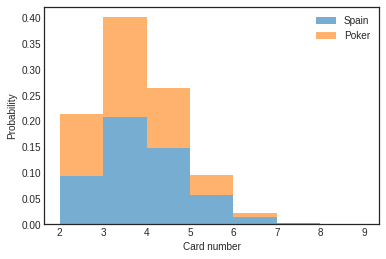

In [7]:
# Punto 1
pruebas = 10000000
count_spain = 0                   # Variable para guardar el numero de victorias con el mazo Español
count_poker = 0                   # Variable para guardar el numero de victorias con el mazo de Poker
taken_cards1 = []                 # Cantidad de cartas tomadas para llegar a 21 (Mazo Español)
taken_cards2 = []                 # Cantidad de cartas tomadas para llegar a 21 (Mazo de Poker)

# Simulacion de las 10000 pruebas
for i in range(pruebas):
  spain_48deck = [1,2,3,4,5,6,7,8,9,10,11,12] * 4
  count_spain = Probabilitydis(spain_48deck, count_spain, taken_cards1)
  poker_52deck = [1,2,3,4,5,6,7,8,9,10,11,12,13] * 4
  count_poker = Probabilitydis(poker_52deck, count_poker, taken_cards2)

print("Probabilidad Baraja Española: ", count_spain/pruebas)
print("Probabilidad Poker 52 cartas:", count_poker/pruebas)

# Graficación en forma de histograma de las cartas necesarias para llegar a completar una 21
bins_set = list (set (taken_cards1).union(set (taken_cards2)))
plt.style.use('seaborn-white')
plt.hist([taken_cards1,taken_cards2], bins= bins_set,  density=True, stacked=True, alpha=0.6, label=['Spain', 'Poker'])
plt.xlabel('Card number')
plt.ylabel('Probability')
plt.legend(loc='upper right');

# Punto 2
Estimate the probability of getting a *21*, the average number of cards required to complete *21* and plot the experimental distribution of the number of card required to complete *21* drawing cards sequentially from:

*Shuffled __Spanish__ 48-card* deck with card values _[1, 2, 3, 4, 5, 6, 7, 8, 9, 10,10,10]_

*Shuffled __Poker__ 52-card* deck with card values _[1, 2, 3, 4, 5, 6, 7, 8, 9,10, 10, 10, 10]_

Ssing Montecarlo with 10 millions simulations.

Probabilidad Mazo Española 48 cartas: 0.1498
Probabilidad Mazo Poker 52 cartas: 0.1400


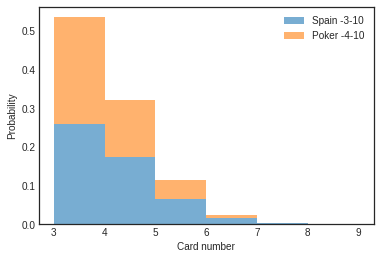

In [8]:
# Punto 2
count_spain = 0                   # Variable para guardar el numero de victorias con el mazo Español
count_poker = 0                   # Variable para guardar el numero de victorias con el mazo de Poker
taken_cards1 = []                 # Cantidad de cartas tomadas para llegar a 21 (Mazo Español)
taken_cards2 = []                 # Cantidad de cartas tomadas para llegar a 21 (Mazo de Poker)
pruebas = 10000000
# Simulacion de las 10000 pruebas
for i in range(pruebas):  
  spain_48deck = [1,2,3,4,5,6,7,8,9,10,10,10] * 4
  count_spain = Probabilitydis(spain_48deck, count_spain, taken_cards1)

  poker_52deck = [1,2,3,4,5,6,7,8,9,10,10,10,10] * 4
  count_poker = Probabilitydis(poker_52deck, count_poker, taken_cards2)

print("Probabilidad Mazo Española 48 cartas: %.4f" %(count_spain/pruebas))
print("Probabilidad Mazo Poker 52 cartas: %.4f" %(count_poker/pruebas))

# Graficación en forma de histograma de las cartas necesarias para llegar a completar una 21
bins_set = list (set (taken_cards1).union(set (taken_cards2)))
plt.style.use('seaborn-white')
plt.hist([taken_cards1,taken_cards2], bins= bins_set,  density=True, stacked=True, alpha=0.6,label=['Spain -3-10', 'Poker -4-10'])
plt.xticks(ticks=bins_set)
plt.xlabel('Card number')
plt.ylabel('Probability')
plt.legend(loc='upper right');

# Punto 3
Estimate the probability of getting a _21_, the average total number of cards required to complete _21_ (Including the three that you start with) and plot the experimental distribution of the number of card required to complete _21_ with drawing cards sequentially from a _shuffled **Spanish** 48-card deck_ with 3 10’s and a _shuffled **Poker** 52-card deck_ with 4 10’s, assuming that you have in your hand the cards **_[7, 7, 5]_** and the remaining deck has $n\over2$ cards. You can pick the $n\over2$ cards in the remaining deck in whatever way you choose but with restriction that this has maximum two *7s* and three *5s*, you have to keep the remaining deck fixed through the simulations, use Montecarlo with 10 millions simulations.

Random Spain half deck:  [10, 2, 10, 7, 10, 8, 8, 6, 7, 6, 8, 3, 1, 10, 3, 10, 9, 10, 3, 5, 10, 10, 4, 9]
Random Poker half deck:  [8, 10, 2, 7, 10, 10, 10, 4, 10, 6, 6, 7, 3, 1, 9, 8, 4, 9, 3, 4, 5, 8, 10, 10, 9, 10]
Probabilidad Baraja Española:  0.042085
Probabilidad Baraja Poker:  0.038603


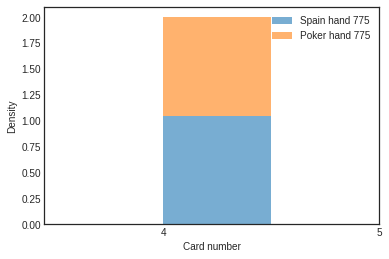

In [9]:
# Punto 3
pruebas = 10000000
spain_halfDeck = []                   # Variable que almacena la mitad de cartas seleccionadas aleatoreamente del Mazo Español
poker_halfDeck = []                   # Variable que almacena la mitad de cartas seleccionadas aleatoreamente del Mazo de Poker
count_spain, count_poker = 0, 0       # Variable donde se guarda el numero de victorias para el mazo correspondiente
taken_cards1 = []                     # Cantidad de cartas tomadas para llegar a 21 (Mazo Español)
taken_cards2 = []                     # Cantidad de cartas tomadas para llegar a 21 (Mazo de Poker)
spain_48deck = [1,2,3,4,5,6,7,8,9,10,10,10] * 4
poker_52deck = [1,2,3,4,5,6,7,8,9,10,10,10,10] * 4

# Particion del Mazo aletaorea
HalfDeck(spain_48deck, spain_halfDeck)
HalfDeck(poker_52deck, poker_halfDeck)
poker_aux = poker_halfDeck
spain_aux = spain_halfDeck

print('Random Spain half deck: ', spain_halfDeck)
print('Random Poker half deck: ', poker_halfDeck)


# Simulacion de las 10000 pruebas
for i in range(1000000):
  poker_halfDeck = poker_aux.copy()
  spain_halfDeck = spain_aux.copy()
  count_spain = ProbabilitydisHalf(spain_halfDeck, count_spain, taken_cards1)
  count_poker = ProbabilitydisHalf(poker_halfDeck, count_poker, taken_cards2)

print("Probabilidad Baraja Española: ",count_spain/1000000)
print("Probabilidad Baraja Poker: ", count_poker/1000000)

# Graficación en forma de histograma de las cartas necesarias para llegar a completar una 21
plt.style.use('seaborn-white')
plt.hist([taken_cards1,taken_cards2], bins=2, stacked=True, density=True, alpha=0.6, label=['Spain hand 775', 'Poker hand 775'])
plt.xlabel('Card number')
plt.xticks(ticks=[4,5])
plt.ylabel('Density')
plt.legend(loc='upper right');

# Punto 4
Find two remaining decks with 10 cards for *Alg Gr 2 11-1*; for a _**Spanish** 48-card_ deck with 3 10’s and for a _**Poker** 52-card deck_ with 4 10’s; one remaining deck with 8 cards that has the highest probability of getting _21_ _**(Hot Deck)**_ and the other remaining deck with 8 cards that has the lowest probability of getting _21_ _**(Cold Deck)**_. Assuming that you have in your hand the cards _**[7, 7, 5]**_, calculate analytically the probabilities of getting a _21_ for both the Hot and Cold deck, also estimate this probabilities of getting a _21_, the average total number of cards required to complete _21_ _(including the three that you start with)_ and plot the experimental distribution of the total number of card required to complete _21_ using Montecarlo with 10 millions simulations.

## Probabilidad analitica
Para el calculo de la probabilidad de conseguir una _21_ con el mazo que se escojera posteriormente se debe tener en cuenta que el evento que se pretende observar _(Tomar una carta aleatorea)_ son independientes entre ellos, por ende la probabilidad que se pretende calcular por el metodo de Montecarlo en esta simulación es obtener 21 por medio de uno de estos dos casos, tomando una sola carta _(un dos)_ o tomano dos cartas _(tomar dos unos consecutivamente)_; como resultado para la probabilidad se tiene la siguiente formula:
$$P(A\cup B) = P(A) + P(B)$$

$P(A) =\frac{x}{n}$

$P(B) = \frac{x}{n}*\left(\frac{x-1}{n-1}\right)$

$A:$ Obtener _21_ sacando un 2.

$B:$ Obtener _21_ sacando dos 1 consecutivos.

De este modo $x$ representa el caso de exitos _(Scara la carta necesaria)_ posibles y $n$ es el total de casos que pueden haber.

* **Hot Deck** : $[1, 1, 1, 1, 2, 2, 2, 2, x, x]$ como se puede observar en esta mazo se toma arbitrariamente los unos y dos, $x$ represenrta cualquier otra carta que se pueda tomar del mazo completo.$$P(A\cup B)=\frac{4}{10}+\left(\frac{4}{10}*\frac{3}{9}\right)=0.533333...$$
* **Cold Deck :** $[1, 1, 2, x, x, x, x, x, x, x]$ como se puede observar en esta mazo se toma arbitrariamente los unos y dos, $x$ represenrta cualquier otra carta que se pueda tomar del mazo completo.$$P(A\cup B)=\frac{1}{10}+\left(\frac{2}{10}*\frac{1}{9}\right)=0.122222...$$

Debido que los valores que puede tomar $x$ no afectan la probabildad que se necesita clacular es indiferente si se supone que las caratas fueron tomadas del mazo Español o el de Poker sin embargo se simularan ambos.

Probability Montecarlo Spain Hot and Cold: 0.5334, 0.1221
Probability Montecarlo Poker Hot and Cold: 0.5332, 0.1222
Probabilidad analítica del Hot Deck: 0.5333
Probabilidad analítica del Cold Deck: 0.1222


Text(0, 0.5, 'Density')

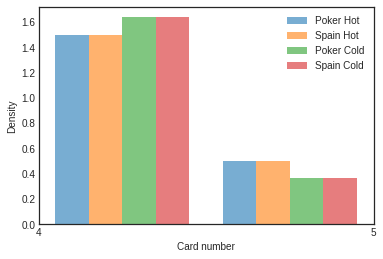

In [10]:
# Punto 4
pruebas = 10000000
# Variables para el almacenamiento de la cantidad de cartas necesarias para conseguir 21 
taken_spain_hot, taken_poker_hot = [], []
taken_spain_cold, taken_poker_cold = [], []
#=======================================================================================#

# Variables donde se lleva la cuenta de las victorias para el mazo respectivo
count_spain_hot, count_poker_hot = 0, 0
count_spain_cold, count_poker_cold = 0, 0
#===========================================================================#

deck_hot = [1, 1, 1, 1, 2, 2, 2, 2, 7, 8]
deck_cold = [1, 1, 2, 10, 8, 5, 3, 10, 9, 7]

# Simulacion de las 10000 pruebas
for i in range(pruebas):
  deck_s = deck_hot.copy()
  deck_p = deck_hot.copy()

  count_poker_hot = ProbabilitydisHalf(deck_p, count_poker_hot, taken_poker_hot)
  count_spain_hot = ProbabilitydisHalf(deck_s, count_spain_hot, taken_spain_hot)

  deck_s2 = deck_cold.copy()
  deck_p2 = deck_cold.copy()

  count_poker_cold = ProbabilitydisHalf(deck_p2, count_poker_cold, taken_poker_cold)
  count_spain_cold = ProbabilitydisHalf(deck_s2, count_spain_cold, taken_spain_cold)

print('Probability Montecarlo Spain Hot and Cold: %.4f, %.4f' %(count_spain_hot/pruebas, count_spain_cold/pruebas))
print('Probability Montecarlo Poker Hot and Cold: %.4f, %.4f' %(count_poker_hot/pruebas, count_poker_cold/pruebas))

print('Probabilidad analítica del Hot Deck: {0:.4f}'.format(4/10 + 4/10 * 3/9))
print('Probabilidad analítica del Cold Deck: {0:.4f}'.format(1/10 + 2/10 * 1/9))

# Graficación en forma de histograma de las cartas necesarias para llegar a completar una 21
plt.style.use('seaborn-white')
plt.hist([taken_poker_hot, taken_spain_hot, taken_poker_cold, taken_spain_cold],
         label=['Poker Hot', 'Spain Hot','Poker Cold', 'Spain Cold'],
         density=True,
#         stacked=True,
         alpha=0.6,
         bins=2)

plt.legend(loc='upper right');
plt.xlabel('Card number')
plt.ylabel('Probability')
plt.xticks(ticks=[4, 5])
plt.ylabel('Density')

# Punto 5
Estimate the average amount of money *(expected value)* that Ben wins or losses on a weekend if Ben goes to Vegas every weekend *(Friday, Saturday and Sunday)*, he plays every weekend day 10 hours, each game takes 3 mins. Assume that for each game he gets two possibilities, in one he gets in his hand the cards **[7, 7, 5]** and a remaining hot deck with 8 cards in which case he bets **\$1000** this happens with probability *1/10*; in the other one he gets no cards in his hand a complete shuffled deck in which case he bets **\$10**, this happens with the remaining probability *9/10*. Use 10000 Montecarlo simulations to estimated the expected amount of money that Ben wins or losses on a weekend for a **Spanish 48-card deck** with 3 10’s and for a **Poker 52-card deck with 4 10’s**.

Ganancias o perdidas mazo Español:  234.469
Ganancias o perdidas mazo Poker: 314.767


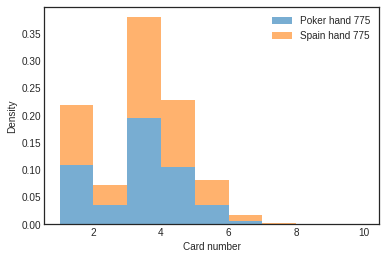

In [11]:
#con 10 millones de simulaciones, cuanto dinero gana o pierde Ben
bets_s, bets_p = 0, 0
taken_poker, taken_spain = [], []
pruebas_5 = 6000000
for i in range(pruebas_5):
  var_hot_deck = rand.randint(1,10)
  spain_48deck = [1,2,3,4,5,6,7,8,9,10,10,10] * 4
  poker_52deck = [1,2,3,4,5,6,7,8,9,10,10,10,10] * 4
  if (var_hot_deck == 1):
    deck_s = [1,1,1,1,2,2,2,2,10,10]
    deck_p = [1,1,1,1,2,2,2,2,10,10]

    if (gamewinnin(deck_s, taken_spain)):
      bets_s += 1000
    else:
      bets_s -= 1000

    if (gamewinnin(deck_p, taken_poker)):
      bets_p += 1000
    else:
      bets_p -= 1000
    
  else:
    if (ColdGame(spain_48deck, taken_spain)):
      bets_s += 10
    else:
      bets_s -= 10
    if (ColdGame(poker_52deck, taken_poker)):
      bets_p += 10
    else:
      bets_p -= 10

print('Ganancias o perdidas mazo Español: ', bets_s/10000)
print('Ganancias o perdidas mazo Poker:', bets_p/10000)

plt.style.use('seaborn-white')
bins_set = list (set (taken_spain).union(set (taken_poker)))
plt.hist([taken_poker, taken_spain], bins = bins_set, density=True, stacked=True, alpha=0.6, label=['Poker hand 775', 'Spain hand 775'])
plt.xlabel('Card number')
plt.ylabel('Probability')
plt.ylabel('Density')
plt.legend(loc='upper right');

# Punto 6
Extra credit _(one class participation)_. Calculate Analytically the average amount of money _(expected values)_ that Ben wins or losses on a weekend for a _**Spanish** 48-card deck_ with 3 10’s and for a _**Poker** 52-card deck_ with 4 10’s.

In [12]:
# Punto 6
# Valor esperado = np, donde n es el número de eventos y p es la probabilidad de cada evento

a =  0.5333 * 1000
b = 1000 * (1 - 0.5333)
c = 10 * 0.1404
d = 10 * (1 - 0.1404)
f = (a - b) * 60
g = (c - d) * 540

print('Dinero Esperado Fines de Semana 600 juegos: ', f + g)


Dinero Esperado Fines de Semana 600 juegos:  112.31999999999789


# Punto 7

Extra credit (one class participation) . Calculate analytically the probabilities of having the cards [7,7,5] and a remaining hot deck with 12,10 and 8 cards, assume that you drawing 12+3,10+3 and 8+3 cards from these cards you draw the 3 cards of the hand and verify if you get a hand with [7,7,5] and the remaining deck is a hot deck.

In [13]:
#Poker
#probabilidad de sacar hot deck [1,1,1,1,2,2,2,2,7,7,5,x...]
p1s = 4/52 * 3/51 * 2/52 * 1/51 
p2s = 4/50 * 3/49 * 2/48 * 1/47 
p7s = 4/46 * 3/45 
p5s = 4/44
pt = p1s * p2s * p7s * p5s
print(pt)

#Probabilidad de sacar 7,7,5
p2 = 2/15 * 1/14 * 1/13
print(p2)

#Intersección 
ptt =  p2 * pt

print('Probabilidad de al tener Poker Hot Deck 12 cartas, optener un 7,7,5: ',ptt)


7.808875157640526e-15
0.0007326007326007325
Probabilidad de al tener Poker Hot Deck 12 cartas, optener un 7,7,5:  5.72078766127511e-18


In [14]:
#Poker
#probabilidad de sacar hot deck [1,1,1,1,2,2,2,2,7,7,5,x...]
p1s = 4/52 * 3/51 * 2/52 * 1/51 
p2s = 4/50 * 3/49 * 2/48 * 1/47 
p7s = 4/46 * 3/45 
p5s = 4/44
pt = p1s * p2s * p7s * p5s
print(pt)

#Probabilidad de sacar 7,7,5
p2 = 2/13 * 1/12 * 1/11
print(p2)

#Intersección 
ptt =  p2 * pt

print('Probabilidad de al tener Poker Hot Deck 10 cartas, optener un 7,7,5: ',ptt)

7.808875157640526e-15
0.0011655011655011657
Probabilidad de al tener Poker Hot Deck 10 cartas, optener un 7,7,5:  9.101253097483131e-18


In [15]:
#Poker
#probabilidad de sacar hot deck [1,1,1,1,2,2,2,2,7,7,5,x...]
p1s = 4/52 * 3/51 * 2/52 * 1/51 
p2s = 4/50 * 3/49 * 2/48 * 1/47 
p7s = 4/46 * 3/45 
p5s = 4/44
pt = p1s * p2s * p7s * p5s
print(pt)

#Probabilidad de sacar 7,7,5
p2 = 2/11 * 1/10 * 1/9
print(p2)

#Intersección 
ptt =  p2 * pt

print('Probabilidad de al tener un Poker Deck 8 cartas, optener un 7,7,5: ',ptt)

7.808875157640526e-15
0.00202020202020202
Probabilidad de al tener un Poker Deck 8 cartas, optener un 7,7,5:  1.577550536897076e-17


In [16]:
#Spain 12
#probabilidad de sacar hot deck [1,1,1,1,2,2,2,2,7,7,5,x...]
p1s = 4/48 * 3/47 * 2/46 * 1/45 
p2s = 4/44 * 3/43 * 2/42 * 1/41 
p7s = 4/40 * 3/39 
p5s = 4/38
pt = p1s * p2s * p7s * p5s
print(pt)

#Probabilidad de sacar 7,7,5
p2 = 2/15 * 1/13 * 1/12
print(p2)

#Intersección 
ptt =  p2 * pt

print('Probabilidad de al tener un Spain Hot Deck 12 cartas, optener un 7,7,5: ',ptt)

3.065432841310986e-14
0.0008547008547008547
Probabilidad de al tener un Spain Hot Deck 12 cartas, optener un 7,7,5:  2.6200280694965696e-17


In [17]:
#Spain 10
#probabilidad de sacar hot deck [1,1,1,1,2,2,2,2,7,7,5,x...]
p1s = 4/48 * 3/47 * 2/46 * 1/45 
p2s = 4/44 * 3/43 * 2/42 * 1/41 
p7s = 4/40 * 3/39 
p5s = 4/38
pt = p1s * p2s * p7s * p5s
print(pt)

#Probabilidad de sacar 7,7,5
p2 = 2/13 * 1/12 * 1/11
print(p2)

#Intersección 
ptt =  p2 * pt

print('Probabilidad de al tener un Spain Hot Deck 10 cartas, optener un 7,7,5: ',ptt)

3.065432841310986e-14
0.0011655011655011657
Probabilidad de al tener un Spain Hot Deck 10 cartas, optener un 7,7,5:  3.5727655493135047e-17


In [18]:
#Spain 8
#probabilidad de sacar hot deck [1,1,1,1,2,2,2,2,7,7,5,x...]
p1s = 4/48 * 3/47 * 2/46 * 1/45 
p2s = 4/44 * 3/43 * 2/42 * 1/41 
p7s = 4/40 * 3/39 
p5s = 4/38
pt = p1s * p2s * p7s * p5s
print(pt)

#Probabilidad de sacar 7,7,5
p2 = 2/11 * 1/10 * 1/9
print(p2)

#Intersección 
ptt =  p2 * pt

print('Probabilidad de al tener un Spain Hot Deck 8 cartas, optener un 7,7,5: ',ptt)

3.065432841310986e-14
0.00202020202020202
Probabilidad de al tener un Spain Hot Deck 8 cartas, optener un 7,7,5:  6.192793618810073e-17
